In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

2024-02-12 16:23:36.109740: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 16:23:36.110010: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 16:23:36.278692: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
images_dir = pathlib.Path('/kaggle/input/scogo-dataset') 

class_images_dict = {
    'device': list(images_dir.glob('device_images/*')),
    'rack': list(images_dir.glob('rack_images/*'))
}

class_labels_dict = {
    'device': 0,
    'rack': 1
}

In [4]:
class_images_dict['device'][:5]

[PosixPath('/kaggle/input/scogo-dataset/device_images/45.jpg'),
 PosixPath('/kaggle/input/scogo-dataset/device_images/56.jpg'),
 PosixPath('/kaggle/input/scogo-dataset/device_images/20.jpg'),
 PosixPath('/kaggle/input/scogo-dataset/device_images/150.jpg'),
 PosixPath('/kaggle/input/scogo-dataset/device_images/6.jpg')]

In [5]:
class_images_dict['rack'][:5]

[PosixPath('/kaggle/input/scogo-dataset/rack_images/45.jpg'),
 PosixPath('/kaggle/input/scogo-dataset/rack_images/56.jpg'),
 PosixPath('/kaggle/input/scogo-dataset/rack_images/20.jpg'),
 PosixPath('/kaggle/input/scogo-dataset/rack_images/6.jpg'),
 PosixPath('/kaggle/input/scogo-dataset/rack_images/109.jpg')]

In [6]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS = 3
X, Y = [], []

for class_name, classes in class_images_dict.items():
    print(class_name)
    for image in classes:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            #print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(class_labels_dict[class_name])
        else:
            #print("Invalid Image")
            continue

device
rack


In [7]:
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((200, 128, 128, 3), (200,))

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

160 160
40 40


In [12]:
IMAGE_CHANNELS = 3
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 61, 61, 64)       

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the path where you want to save the best weights
checkpoint_path = 'scogo_best.h5'

# Define the callback to save only the best weights based on validation accuracy
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

# Train the model with the callback
history = model.fit(X_train, Y_train,
                    batch_size=32,
                    verbose=1,
                    epochs=45,
                    validation_data=(X_test, Y_test),  # Provide validation data here
                    callbacks=[checkpoint])  # Pass the callback here

Epoch 1/45
5/5 [==============================] - ETA: 0s - loss: 1.2454 - accuracy: 0.7500
Epoch 1: val_accuracy improved from -inf to 0.55000, saving model to scogo_best.h5
5/5 [==============================] - 9s 1s/step - loss: 1.2454 - accuracy: 0.7500 - val_loss: 80.1274 - val_accuracy: 0.5500
Epoch 2/45
5/5 [==============================] - ETA: 0s - loss: 0.8202 - accuracy: 0.8750
Epoch 2: val_accuracy did not improve from 0.55000
5/5 [==============================] - 6s 1s/step - loss: 0.8202 - accuracy: 0.8750 - val_loss: 27.2624 - val_accuracy: 0.5500
Epoch 3/45
5/5 [==============================] - ETA: 0s - loss: 0.2704 - accuracy: 0.9563
Epoch 3: val_accuracy improved from 0.55000 to 0.82500, saving model to scogo_best.h5
5/5 [==============================] - 6s 1s/step - loss: 0.2704 - accuracy: 0.9563 - val_loss: 2.9484 - val_accuracy: 0.8250
Epoch 4/45
5/5 [==============================] - ETA: 0s - loss: 0.2175 - accuracy: 0.9625
Epoch 4: val_accuracy improved f

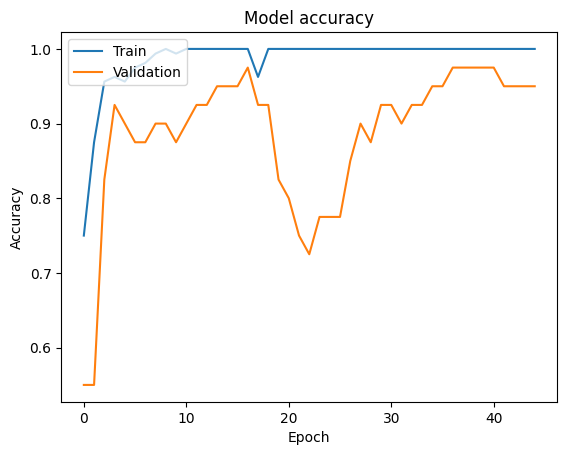

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 50ms/step - loss: 0.1720 - accuracy: 0.9500


[0.1719854176044464, 0.949999988079071]

In [16]:
from keras.models import load_model
from PIL import Image

def predict_class(image_path):
    
    classes = ["device", "rack"]
    fileImage = Image.open(image_path).convert("RGB").resize([IMAGE_WIDTH, IMAGE_HEIGHT], Image.LANCZOS)
    image = np.array(fileImage)
    myimage = image.reshape(1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)

    plt.figure(figsize=(4, 2))
    plt.imshow(image)

    # Load the saved model
    model_path = '/kaggle/working/scogo_best.h5'
    model = load_model(model_path)

    my_predicted_image = model.predict(myimage)
    print(my_predicted_image)

    # Assuming threshold of 0.5 for binary classification
    y_class = int(my_predicted_image > 0.5)
    print("Class:", y_class, "Name:", classes[y_class])


1/1 [==============================] - 0s 202ms/step
[[9.655744e-06]]
Class: 0 Name: device


/tmp/ipykernel_33/106012970.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_class = int(my_predicted_image > 0.5)


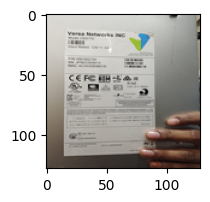

In [17]:
predict_class('/kaggle/input/scogo-dataset/Unseen Data/device_16.jpg')

1/1 [==============================] - 0s 147ms/step
[[0.8801402]]
Class: 1 Name: rack


/tmp/ipykernel_33/106012970.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_class = int(my_predicted_image > 0.5)


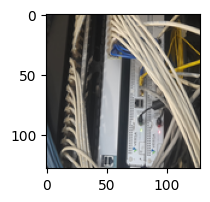

In [22]:
predict_class('/kaggle/input/scogo-dataset/Unseen Data/rack_11.jpg')

1/1 [==============================] - 0s 155ms/step
[[0.9885126]]
Class: 1 Name: rack


/tmp/ipykernel_33/106012970.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_class = int(my_predicted_image > 0.5)


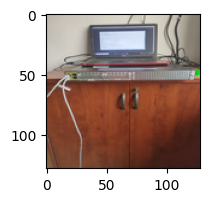

In [23]:
predict_class('/kaggle/input/scogo-dataset/Unseen Data/rack_24.jpg')

In [25]:
import os
import numpy as np
import pandas as pd
from keras.models import load_model
from PIL import Image

def predict_classes_in_directory(directory_path):
    classes = ["device", "rack"]
    predictions = []

    # Load the saved model
    model_path = '/kaggle/working/scogo_best.h5'
    model = load_model(model_path)

    for file_name in os.listdir(directory_path):
        if file_name.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Check if it's an image file
            image_path = os.path.join(directory_path, file_name)
            fileImage = Image.open(image_path).convert("RGB").resize([IMAGE_WIDTH, IMAGE_HEIGHT], Image.LANCZOS)
            image = np.array(fileImage)
            myimage = image.reshape(1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)

            # Make predictions
            my_predicted_image = model.predict(myimage)

            # Assuming threshold of 0.5 for binary classification
            predicted_class = classes[int(my_predicted_image > 0.5)]
            predictions.append(predicted_class)

    # Create a DataFrame to store results
    df = pd.DataFrame({'Filename': os.listdir(directory_path), 'Predicted_Class': predictions})
    return df

# Path to the directory containing images
images_directory = '/kaggle/input/scogo-dataset/Unseen Data'

# Predict classes for images in the directory
results_df = predict_classes_in_directory(images_directory)

# Save results to CSV
results_csv_path = '/kaggle/working/predictions.csv'
results_df.to_csv(results_csv_path, index=False)

print(f"Predictions saved to {results_csv_path}.")


1/1 [==============================] - 0s 158ms/step


/tmp/ipykernel_33/3331351656.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = classes[int(my_predicted_image > 0.5)]


1/1 [==============================] - 0s 50ms/step
Predictions saved to /kaggle/working/predictions.csv.


In [26]:
import pandas as pd
df = pd.read_csv('/kaggle/working/predictions.csv')
df.head()

,Filename,Predicted_Class
0,rack_11.jpg,rack
1,rack_24.jpg,rack
2,device_7.jpg,device
3,rack_37.jpg,device
4,rack_2.jpg,rack


In [27]:
df['Actual_Class'] = df['Filename'].str.split('_').str[0]
df.head()

,Filename,Predicted_Class,Actual_Class
0,rack_11.jpg,rack,rack
1,rack_24.jpg,rack,rack
2,device_7.jpg,device,device
3,rack_37.jpg,device,rack
4,rack_2.jpg,rack,rack


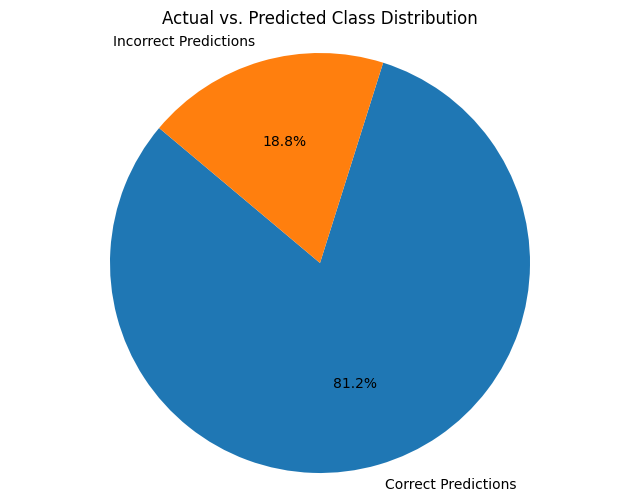

In [28]:
# Count the number of cases where actual class matches predicted class
correct_predictions = (df['Actual_Class'] == df['Predicted_Class']).sum()

# Count the number of cases where actual class doesn't match predicted class
incorrect_predictions = len(df) - correct_predictions

# Create labels and values for the pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
values = [correct_predictions, incorrect_predictions]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Actual vs. Predicted Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [29]:
correct_predictions, incorrect_predictions

(52, 12)

In [30]:
accuracy_rate = correct_predictions / len(df)
print(f"Out of 500K images, ",500000*accuracy_rate, " images will be predicted right.")

Out of 500K images,  406250.0  images will be predicted right.
